In [16]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [17]:
# Load dataset
df = pd.read_csv('Titanic-Dataset.csv')
print("Initial Data Preview:")
print(df.head())

Initial Data Preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

In [18]:
# Show columns to confirm naming
print("\nColumn Names:")
print(df.columns)


Column Names:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [19]:
# Step 2: Basic info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [20]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [21]:
# Step 3: Handle missing values
# Fill 'Age' column with its median
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

In [22]:
# Fill 'Embarked' column with mode
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [23]:
# Drop 'Cabin' column if it exists (many missing values in Titanic datasets)
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])

In [24]:
# Drop any remaining missing values
df = df.dropna()

In [25]:
# Step 4: Encode categorical columns
label_encoder = LabelEncoder()
categorical_cols = ['Sex', 'Embarked', 'Pclass', 'Name', 'Ticket', 'SibSp', 'Parch', 'Fare', 'PassengerId']

In [26]:

for col in df.columns:
    if df[col].dtype == 'object' and col not in ['Name', 'Ticket']:  # exclude text-heavy ones
        df[col] = label_encoder.fit_transform(df[col])

In [27]:
# Step 5: Normalize/Standardize numeric columns
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [28]:
# Remove IDs and categorical numerical labels from normalization
exclude_cols = ['PassengerId', 'Pclass', 'SibSp', 'Parch']
num_cols = [col for col in num_cols if col not in exclude_cols]

In [29]:
df[num_cols] = scaler.fit_transform(df[num_cols])

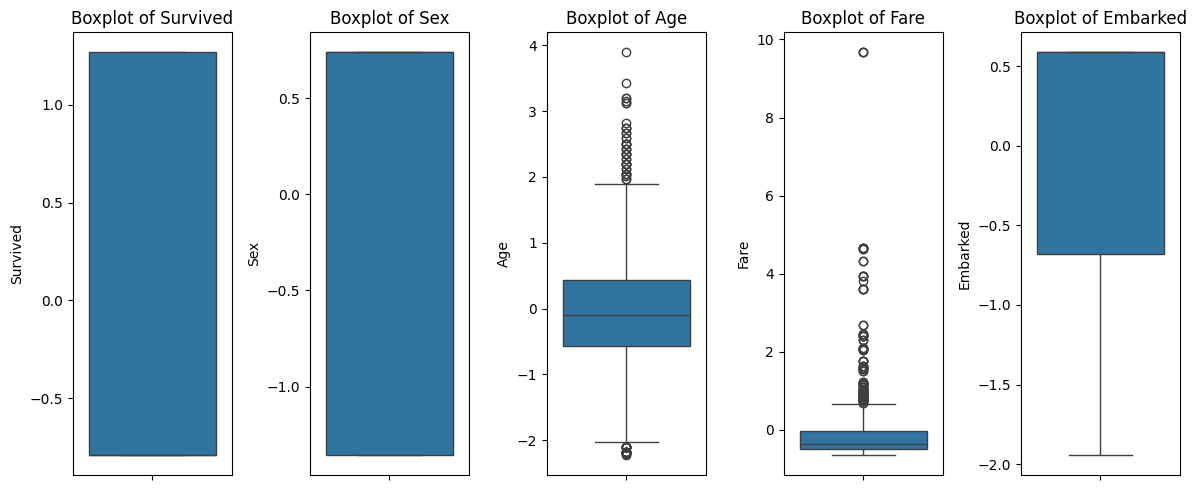

In [30]:
# Step 6: Visualize outliers
plt.figure(figsize=(12, 5))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [31]:

# Step 7: Remove outliers using IQR method
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [32]:
# Final cleaned data
print("\nCleaned Data Preview:")
print(df.head())
print("\nFinal Shape:", df.shape)


Cleaned Data Preview:
   PassengerId  Survived  Pclass  \
0            1 -0.789272       3   
2            3  1.266990       3   
3            4  1.266990       1   
4            5 -0.789272       3   
6            7 -0.789272       1   

                                           Name       Sex       Age  SibSp  \
0                       Braund, Mr. Owen Harris  0.737695 -0.565736      1   
2                        Heikkinen, Miss. Laina -1.355574 -0.258337      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel) -1.355574  0.433312      1   
4                      Allen, Mr. William Henry  0.737695  0.433312      0   
6                       McCarthy, Mr. Timothy J  0.737695  1.893459      0   

   Parch            Ticket      Fare  Embarked  
0      0         A/5 21171 -0.502445  0.585954  
2      0  STON/O2. 3101282 -0.488854  0.585954  
3      0            113803  0.420730  0.585954  
4      0            373450 -0.486337  0.585954  
6      0             17463  0.395814  0.585954